# Introduction
### What questions or hypotheses will you be investigating? Why did you choose these questions or hypotheses — why are they interesting or important to you?
My project looks at data of passengers on the Titanic. There are many different aspects of the dataset, but I will be looking specifically at each passenger's class and whether they survived or not. My hypothesis is that passengers in Class 1 (first class) will have the highest rate of survival, followed by passengers in Class 2, and finally Class 3 will have the lowest rate of survival. 

Null hypothesis, Ho: Titanic passenger class and survival are independent.

Alternative hypothesis, Ha: Titanic passenger class and survival are associated.

I chose to study this hypothesis because I think it's interesting to look at how socioeconomic classes and financial accessibility often determine life or death. My initial analyses of the visual data suggest that there are differences in survival rate, indicating a deeper issue about how socioeconomic status affects a person's life projection.

### What datasets will you be using to address your questions or hypotheses? How will these data allow you to address your questions or hypotheses?
I am using a dataset published by the Vanderbilt Department of Biostatistics (https://hbiostat.org/data/repo/titanic5.csv). It includes data on each passenger, with main datapoints such as Name, Sex, Age, Class, ticket number, whether they survived or not, and more. I will be using the Class and Survived columns to address my hypothesis. 

### Load your datasets into Python, to make sure you are good to go. Explain the organization of your data. For example, if your data are formatted as rows and columns, what do these rows and columns represent?
My data is in csv format with 19 columns representing each passenger's:
name ID,
legal name,
sex,
age,
class,
ticket number,
location they joined from,
occupation,
which boat they were on,
ticket price,
Whether they survived,
Their boat job (if they were an employee of the ship),
A URL to an html file with more data,
death date,
birth date,
(and the last 4 aren't fully explained but I will include them)
age f code,
age f,
sibsp,
parch.
Each row is a new passenger with a unique ID.
I imported Pandas and used it to read the csv file into Jupyter Lab and then created a dataframe that was sorted in ascending order of Class (1 to 3).

# Data Organization

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
import numpy as np
from tabulate import tabulate

In [157]:
# Loading csv into dataframe
df = pd.read_csv('titanic5.csv')
df.head()

,Name_ID,Name,Sex,Age,Class,Ticket,Joined,Occupation,Boat [Body],Price,Job,Survived,URL,Date_Death,DoB_Clean,Age_F_Code,Age_F,sibsp,parch
0,28,"ALLEN, Miss Elisabeth Walton",female,29.00,1,24160,Southampton,NaN,2,£211 60s 9d,NaN,1,/titanic-survivor/elisabeth-walton-allen.html,12/15/1967,10/1/1882,C,29.0,0,0
1,35,"ALLISON, Master Hudson Trevor",male,0.92,1,113781,Southampton,NaN,11,£151 16s,NaN,1,/titanic-survivor/trevor-allison.html,8/7/1929,5/7/1911,C,1.0,1,2
2,36,"ALLISON, Miss Helen Loraine",female,2.00,1,113781,Southampton,NaN,,£151 16s,NaN,0,/titanic-victim/loraine-allison.html,4/15/1912,6/5/1909,C,2.0,1,2
3,37,"ALLISON, Mr Hudson Joshua Creighton",male,30.00,1,113781,Southampton,Businessman,[135],£151 16s,NaN,0,/titanic-victim/hudson-joshua-creighton.html,4/15/1912,12/9/1881,C,30.0,1,2
4,38,"ALLISON, Mrs Bessie Waldo",female,25.00,1,113781,Southampton,NaN,,£151 16s,NaN,0,/titanic-victim/bessie-waldo-allison.html,4/15/1912,11/14/1886,C,25.0,1,2


In [158]:
# Organizing data increasing by class (starting Class 1 to Class 2 to Class 3)
df_organized = data.sort_values('Class',ascending=True)
df_organized.head()

,Name_ID,Name,Sex,Age,Class,Ticket,Joined,Occupation,Boat [Body],Price,Job,Survived,URL,Date_Death,DoB_Clean,Age_F_Code,Age_F,sibsp,parch
0,28,"ALLEN, Miss Elisabeth Walton",female,29.0,1,24160,Southampton,NaN,2,£211 60s 9d,NaN,1,/titanic-survivor/elisabeth-walton-allen.html,12/15/1967,10/1/1882,C,29.0,0,0
220,1567,"PEñASCO Y CASTELLANA, Mrs Maria Josefa Perezde...",female,22.0,1,17758,Cherbourg,Of Independent Means,8,£108 18s,NaN,1,/titanic-survivor/maria-penasco.html,4/3/1972,9/3/1889,C,22.0,1,0
219,1566,"PEñASCO Y CASTELLANA, Mr Victor",male,24.0,1,17758,Cherbourg,Of Independent Means,,£108 18s,NaN,0,/titanic-victim/victor-penasco.html,4/15/1912,10/24/1887,C,24.0,1,0
218,1559,"PEARS, Mrs Edith",female,22.0,1,113776,Southampton,NaN,8,£66 12s,NaN,1,/titanic-survivor/edith-pears.html,,9/1/1889,C,22.0,1,0
217,1558,"PEARS, Mr Thomas Clinton",male,29.0,1,113776,Southampton,Of Independent Means,,£66 12s,NaN,0,/titanic-victim/thomas-clinton-pears.html,4/15/1912,5/7/1882,C,29.0,1,0


# Data Visualization

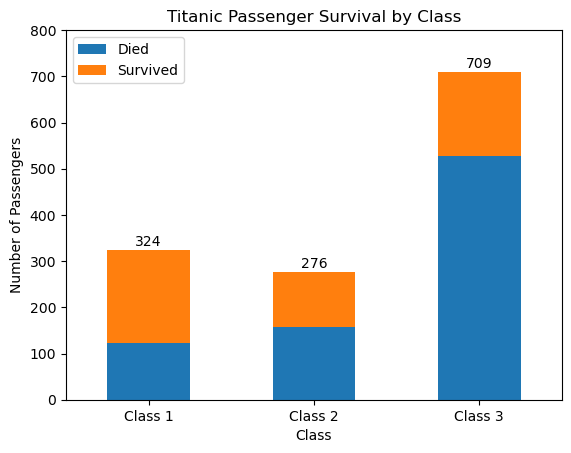

In [159]:
# Creating a bar graph that shows the total amount of survival and deaths per class

# Grouping the data by class and count the number of passengers who survived
survival_counts = df_organized.groupby(['Class', 'Survived'])['Name'].count().unstack()

ax = survival_counts.plot(kind='bar', stacked=True)

totals = [sum(survival_counts.loc[i]) for i in range(1, 4)]
for i, total in enumerate(totals):
    ax.text(i, total+10, str(total), horizontalalignment='center')
    
plt.xticks(range(3), ['Class 1', 'Class 2', 'Class 3'])
plt.xticks(rotation=0)
plt.ylim(0,800)

ax.legend(['Died', 'Survived'])
plt.title('Titanic Passenger Survival by Class')
plt.ylabel('Number of Passengers')

plt.show()

FIGURE 1: This graph shows the amount of passengers in each class that died (indicated with a 0 in blue), the amount that survived (indicated with a 1 in orange), and the total number of passengers in the class at the top of each bar.

In [160]:
# Creating a table of each class along with how many survived and how many died

# Calculate total number of passengers per class
class_totals = df_organized.groupby('Class')['Name'].count()

# Creating a table of survival counts
table = []
for cls in range(1, 4):
    surv = survival_counts.loc[cls, 1]
    not_surv = survival_counts.loc[cls, 0]
    total = class_totals.loc[cls]
    table.append([f'Class {cls}', surv, not_surv, total])

# Adding a new row for total counts
total_survived = sum(survival_counts[1])
total_died = sum(survival_counts[0])
total_passengers = sum(class_totals)
table.append(['Total', total_survived, total_died, total_passengers])

print(tabulate(table, headers=['Class', 'Survived', 'Died', 'Total'], tablefmt='grid', showindex='never'))

+---------+------------+--------+---------+
| Class   |   Survived |   Died |   Total |
+=========+============+========+=========+
| Class 1 |        201 |    123 |     324 |
+---------+------------+--------+---------+
| Class 2 |        118 |    158 |     276 |
+---------+------------+--------+---------+
| Class 3 |        181 |    528 |     709 |
+---------+------------+--------+---------+
| Total   |        500 |    809 |    1309 |
+---------+------------+--------+---------+


TABLE 1: This table depicts the amount of people that survived and died in each class along with the total number of passengers in that class.

In [161]:
# Creating a table of the survival rate per class
table = tabulate(survival_counts.values.tolist(), headers=["Class", "Survival Rate"], tablefmt="grid")
print(table)

+---------+-----------------+
|   Class |   Survival Rate |
+=========+=================+
|     123 |             201 |
+---------+-----------------+
|     158 |             118 |
+---------+-----------------+
|     528 |             181 |
+---------+-----------------+


TABLE 2: This table shows the survival rate per class.

Given their numbers differed greatly, Class 1 had the highest rate of survival, followed by Class 2, and finally Class 3 had the lowest rate. 

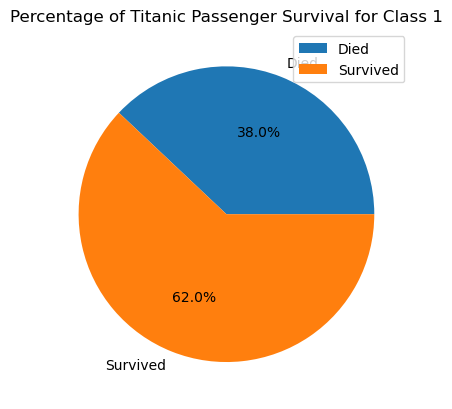

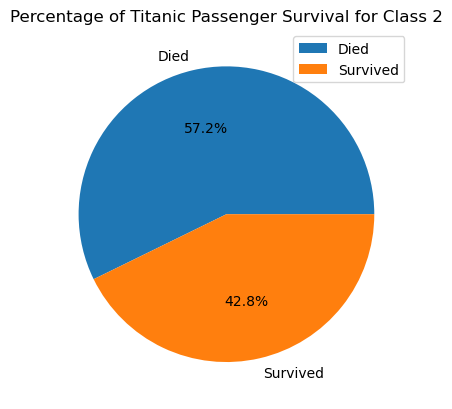

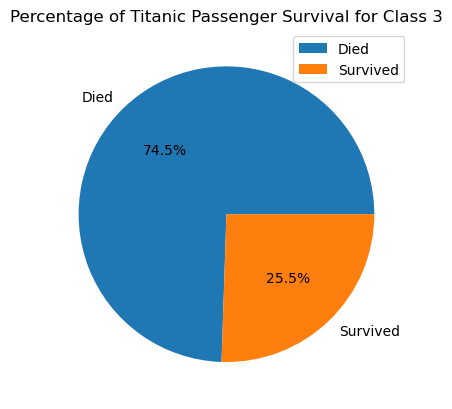

In [162]:
# Creating 3 individual pie charts to show proportion of survival per class
# Looping 3 times, one for each class
for i in range(1, 4):
    class_counts = survival_counts.loc[i]
    plt.pie(class_counts, labels=['Died', 'Survived'], autopct='%1.1f%%')
    plt.title(f'Percentage of Titanic Passenger Survival for Class {i}')
    plt.legend()
    plt.show()

FIGURES 2 A, B, C: These images depict three individual pie charts showing the proportion of survival per Titanic Class.

About 2/3rds of Class 1 passengers survived, a little less than half of Class 2 passengers survived, and only about a quarter of Class 3 passengers survived. 

In [163]:
# Creating a contingency table of observed values of survival
contingency_table = pd.crosstab(df_organized['Survived'], df_organized['Class'])
headers = ['Class 1', 'Class 2', 'Class 3']
index = ['Died', 'Survived']
print(tabulate(contingency_table, headers=headers, showindex=index, tablefmt='grid'))

# Chi square TOI
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('Degrees of freedom:', dof)
print('p-value:', p)

+----------+-----------+-----------+-----------+
|          |   Class 1 |   Class 2 |   Class 3 |
+==========+===========+===========+===========+
| Died     |       123 |       158 |       528 |
+----------+-----------+-----------+-----------+
| Survived |       201 |       118 |       181 |
+----------+-----------+-----------+-----------+
Chi-square statistic: 128.6299765061001
Degrees of freedom: 2
p-value: 1.1704570935740868e-28


TABLE 3: Above is a contingency table used in the calculation of the Chi Square Test of Independence test along with the test statistic, degrees of freedom, and p-value (X^2 = 128.6299, df = 2, p < 0.05). 

The p-value is incredibly small and less than 0.05, indicating that the variables of class and survival are dependent on one another.

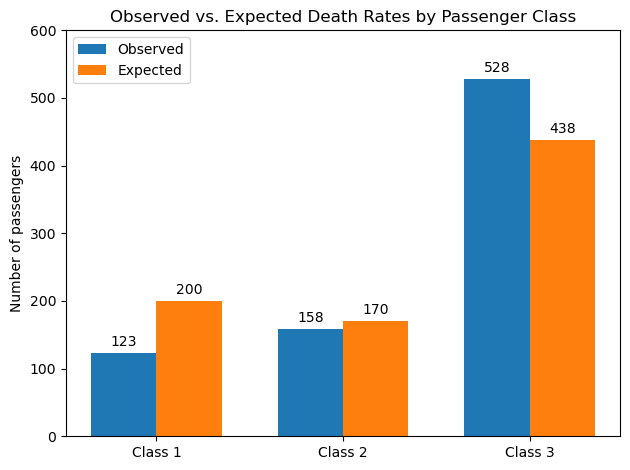

In [164]:
# Creating a bar graph of observed vs. expected values

# Defining labels
labels = ['Class 1', 'Class 2', 'Class 3']
# Getting the observed and expected values from the contingency table
observed_values = contingency_table.values
expected_values = expected.astype(int)

# Defining the position and width of the bars
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
obs = ax.bar(x - width/2, observed_values[0], width, label='Observed')
exp = ax.bar(x + width/2, expected_values[0], width, label='Expected')

ax.set_ylabel('Number of passengers')
ax.set_title('Observed vs. Expected Death Rates by Passenger Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.ylim(0,600)
ax.legend()

# Defining a function to add labels of total counts to the top of the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha='center', va='bottom')

autolabel(obs)
autolabel(exp)

fig.tight_layout()

plt.show()

FIGURE 3: The above graph visualizes the Chi Square TOI by showing the observed vs. expected death rates per class.

Based on the data, more people in Class 3 were observed dead than expected, whereas less people actually died in Class 1 than expected, and about the same died as expected in Class 2.

In [165]:
# Odds ratios
odds_ratios = [    ["Class 3 vs. Class 2", odds_ratio_class3_class2],
    ["Class 3 vs. Class 1", odds_ratio_class3_class1]
]

print(tabulate(odds_ratios, headers=["Comparison", "Odds Ratio"], tablefmt="grid"))

+---------------------+--------------+
| Comparison          |   Odds Ratio |
+=====================+==============+
| Class 3 vs. Class 2 |      2.17861 |
+---------------------+--------------+
| Class 3 vs. Class 1 |      4.76701 |
+---------------------+--------------+


TABLE 4: Above are the calculated odds ratios comparing Class 3 passengers' likeliness to die to passengers in Classes 1 and 2. 

Class 3 passengers were 2.17 times more likey to die than those in Class 2, and 4.7 times as likely to die than those in Class 1.

# Discussion
### What did you discover in your analyses?
After running a Chi Square Test of Independence, it was found that the proportion of individuals who died compared to those who survived based on class is not independent, and instead actually associated (X^2 = 128.6299, df = 2, p < 0.05). The frequency of survival is dependent on which class a passenger was in. Odds ratios were calculated, and it was determined that a passenger in Class 3 was 2.1786 times more likely to die than a passenger in Class 2, and 4.7670 times more likely to die than a passenger in Class 1.

### Relate these discoveries to your original questions/hypotheses.
These results indicate that we can reject the null hypothesis that class and survival are independent. Furthermore, I expanded on my hypothesis by stating that Class 3 had the lowest rate of survival, and the data agreed with my statement.

Even though the vast majority of passengers on the Titanic were in Class 3 (709/1309), they were still the most neglected. Gates covered the ship so that passengers were only allowed to interact with their respective classes, and Class 3 passengers were forced to stay in their area of the ship when it hit the iceberg. Furtheremore, there were little to no life boats left for Class 3 passengers since most had been accomodated towards Class 1 and 2 passengers first. Without proper care and attention, most were destined to die.

### Describe at least one limitation to your analysis.
One limitation to this study could be that since the Titanic sunk over 100 years ago, the record keeping could be inaccurate. There may have been bodies that weren't found, people who weren't taken into account, or more confounding variables that affect the data in the dataset. 